In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [91]:
df = pd.read_csv("/content/TinderSwindlerVersion2.csv")

In [92]:
df.head()

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
0,globalnode.saito 🟥🐳🐈‍⬛,Travelling the World on Web3,2009-06-03 20:18:22+00:00,768,False,2022-02-09 17:09:22+00:00,"@T1gmee Tinder Swindler, off Netflix",Twitter for iPhone,False
1,Ungovernable 🇧🇮,NaN,2011-09-04 22:46:26+00:00,385,False,2022-02-09 17:09:18+00:00,"#tinderswindler , basically homeboy got away w...",Twitter for iPhone,False
2,Adefolake,NaN,2009-06-02 14:18:44+00:00,1994,False,2022-02-09 17:09:17+00:00,Not the tinder swindler becoming a TIk Tok sta...,Twitter for iPhone,False
3,✧ ☽,Noord-Brabant,2012-02-12 07:35:26+00:00,336,False,2022-02-09 17:09:07+00:00,Why isn’t Shimon Hayut in jail ????? #thetinde...,Twitter for iPhone,False
4,chivo. 🥶,PG/MD,2010-03-22 21:23:17+00:00,1046,False,2022-02-09 17:09:06+00:00,the tinder swindler a sick nigga 😂😂,Twitter Web App,False


In [93]:
df.isna().sum()

user_name             5
user_location     18481
user_created          0
user_followers        0
user_verified         0
date                  0
text                  0
source                0
is_retweet            0
dtype: int64

In [94]:
df.isna().mean()*100

user_name          0.006561
user_location     24.249144
user_created       0.000000
user_followers     0.000000
user_verified      0.000000
date               0.000000
text               0.000000
source             0.000000
is_retweet         0.000000
dtype: float64

In [95]:
df["user_location"].fillna("Unknown", inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76213 entries, 0 to 76212
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_name       76208 non-null  object
 1   user_location   76213 non-null  object
 2   user_created    76213 non-null  object
 3   user_followers  76213 non-null  int64 
 4   user_verified   76213 non-null  bool  
 5   date            76213 non-null  object
 6   text            76213 non-null  object
 7   source          76213 non-null  object
 8   is_retweet      76213 non-null  bool  
dtypes: bool(2), int64(1), object(6)
memory usage: 4.2+ MB


In [97]:
df.sample(2)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
71193,mirai// ☺︎,郷敦沼 !,2021-08-18 23:57:37+00:00,342,False,2022-02-03 08:13:09+00:00,just watched that tinder swindler on netflix a...,Twitter for iPhone,False
31215,ShannaNina,The Netherlands,2013-12-27 19:23:08+00:00,9341,False,2022-02-06 20:56:43+00:00,The Tinder swindler isn't even banned on tinde...,Twitter for Android,False


In [98]:
df["user_followers"] = df["user_followers"].astype(int)

In [99]:
df["user_created"] = pd.to_datetime(df["user_created"])

In [100]:
df["date"] = pd.to_datetime(df["date"])

In [101]:
df["user_followers"].sort_values(ascending=False)

15312    19410390
8085     19410385
3369     19410383
28234    18670019
74799    15940034
           ...   
4357            0
74358           0
22703           0
60284           0
57142           0
Name: user_followers, Length: 76213, dtype: int64

In [102]:
df.sort_values("user_followers", ascending=False).head(10)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
15312,The Wall Street Journal,"New York, NY",2007-04-01 06:22:13+00:00,19410390,True,2022-02-08 03:45:10+00:00,"Simon Leviev, the subject of Netflix's documen...",SocialFlow,False
8085,The Wall Street Journal,"New York, NY",2007-04-01 06:22:13+00:00,19410385,True,2022-02-08 20:15:05+00:00,"Simon Leviev, the subject of Netflix's documen...",SocialFlow,False
3369,The Wall Street Journal,"New York, NY",2007-04-01 06:22:13+00:00,19410383,True,2022-02-09 07:00:12+00:00,"Simon Leviev, the subject of Netflix's documen...",SocialFlow,False
28234,The Washington Post,"Washington, DC",2007-03-27 11:19:39+00:00,18670019,True,2022-02-07 01:04:22+00:00,Netflix released a new true crime documentary ...,SocialFlow,False
74799,Netflix,"California, USA",2008-10-03 04:16:17+00:00,15940034,True,2022-02-02 19:00:58+00:00,This is what it feels like when a con artist w...,Netflix,False
58387,Netflix,"California, USA",2008-10-03 04:16:17+00:00,15939686,True,2022-02-04 22:00:00+00:00,"Posing as a wealthy, jet-setting diamond mogul...",Netflix,False
8760,Netflix,"California, USA",2008-10-03 04:16:17+00:00,15938865,True,2022-02-08 19:00:00+00:00,the heroes of The Tinder Swindler https://t.co...,Netflix,False
37690,E! News,"Hollywood, CA",2007-03-29 19:42:27+00:00,11782960,True,2022-02-06 13:11:04+00:00,There Are Bad Dates and Then There's The Tinde...,SocialFlow,False
21451,E! News,"Hollywood, CA",2007-03-29 19:42:27+00:00,11782932,True,2022-02-07 17:28:34+00:00,Tinder Swindler Con Man Banned From Dating App...,SocialFlow,False
11541,E! News,"Hollywood, CA",2007-03-29 19:42:27+00:00,11782911,True,2022-02-08 13:44:56+00:00,French Montana Reveals He Met the Tinder Swind...,SocialFlow,False


In [103]:
df["source"].value_counts()

source
Twitter for iPhone                 47828
Twitter for Android                18421
Twitter Web App                     6865
Twitter for iPad                     506
TweetDeck                            495
                                   ...  
PLANOLY                                1
HaikuD2                                1
Janetter for Android                   1
Quick Tweet - just tweet simply        1
DataScienceInfo                        1
Name: count, Length: 210, dtype: int64

<Axes: title={'center': 'Top 15 Sources'}, ylabel='source'>

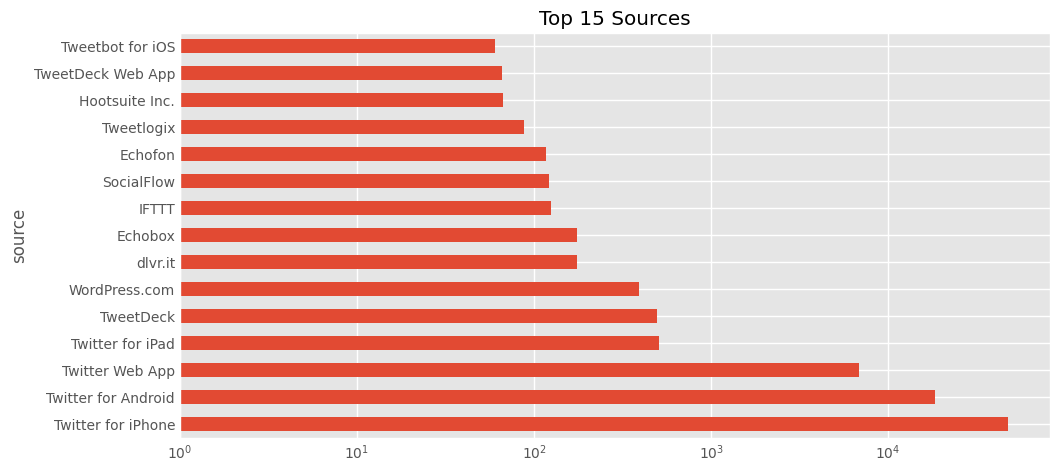

In [104]:
df["source"].value_counts().head(15).plot(kind="barh", title="Top 15 Sources", figsize=(10,5), log=True)

In [110]:
df["user_location"].value_counts().head(20)

user_location
Unknown                       18486
London, England                1955
London                         1275
Johannesburg, South Africa     1002
Nairobi, Kenya                  964
Lagos, Nigeria                  956
South Africa                    953
Los Angeles, CA                 586
Nigeria                         476
Cape Town, South Africa         473
United Kingdom                  448
New York, NY                    414
Atlanta, GA                     400
England, United Kingdom         390
Kenya                           383
United States                   370
Toronto, Ontario                338
Pretoria, South Africa          321
Chicago, IL                     288
Houston, TX                     251
Name: count, dtype: int64

<Axes: title={'center': 'Top 20 Locations'}, xlabel='user_location'>

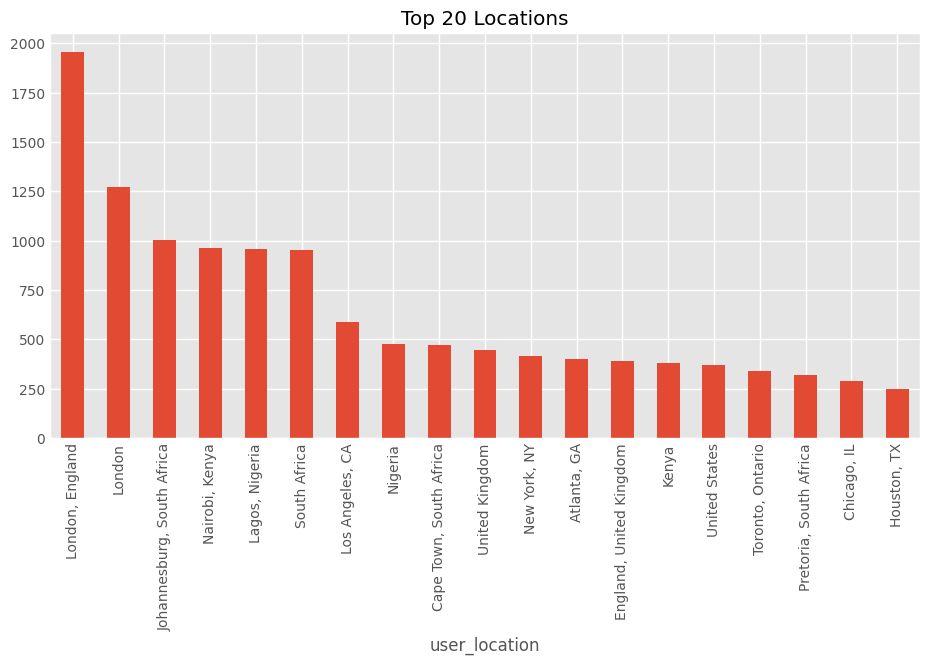

In [111]:
df["user_location"].value_counts().head(20).drop("Unknown").plot(kind="bar", figsize=(10,5), title="Top 20 Locations")

In [112]:
df.sample(2)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
17263,JQ🍭,Unknown,2015-08-31 08:45:26+00:00,917,False,2022-02-07 23:47:21+00:00,"I aint gonn lie, these bitches on tinder swind...",Twitter for iPhone,False
6137,han-nuh,Boston (mentally); San Diego,2013-09-03 05:21:53+00:00,268,False,2022-02-08 23:55:24+00:00,I support one girl boss and it’s ayleen from t...,Twitter for iPhone,False


In [116]:
df.loc[df["is_retweet"] == True]

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet


In [117]:
df["is_retweet"].value_counts()

is_retweet
False    76213
Name: count, dtype: int64

In [118]:
df["user_verified"].value_counts()

user_verified
False    74198
True      2015
Name: count, dtype: int64

In [121]:
df.loc[df["user_verified"] == True, ['user_location']].value_counts()

user_location              
Unknown                        222
London                         160
London, England                128
Los Angeles, CA                 85
New York, NY                    63
                              ... 
Leicester                        1
Las Vegas, NV                    1
Lagos 🇳🇬 East Midlands 🇬🇧.       1
LDN via Lagos via Dublin 🇮🇪      1
📍NYC                             1
Name: count, Length: 591, dtype: int64

<ipython-input-125-157ed4d63cf7>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.loc[df["user_verified"] == True, ['user_location']].value_counts().head(20).drop("Unknown")\


<Axes: title={'center': 'Top 20 location of verified users'}, xlabel='user_location'>

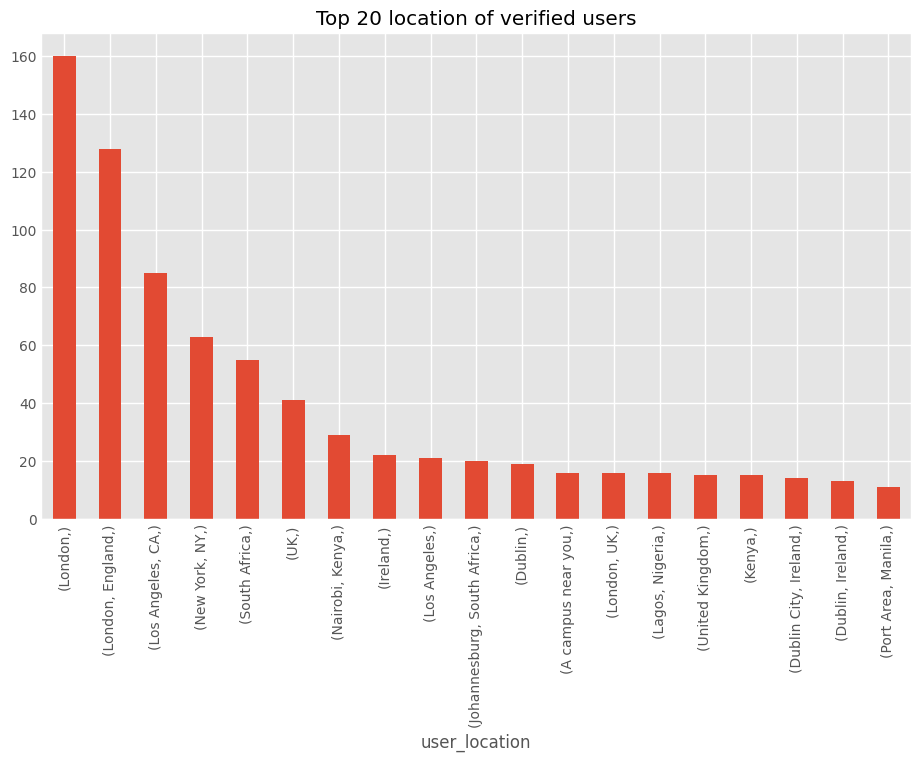

In [125]:
df.loc[df["user_verified"] == True, ['user_location']].value_counts().head(20).drop("Unknown")\
.plot(kind="bar", figsize=(10, 6), x="user_location", title="Top 20 location of verified users")

In [130]:
df[df["user_verified"] == False]["user_location"].value_counts().head(20).drop("Unknown")

user_location
London, England               1827
London                        1115
Johannesburg, South Africa     982
Lagos, Nigeria                 940
Nairobi, Kenya                 935
South Africa                   898
Los Angeles, CA                501
Nigeria                        470
Cape Town, South Africa        467
United Kingdom                 433
Atlanta, GA                    391
England, United Kingdom        379
Kenya                          368
United States                  360
New York, NY                   351
Toronto, Ontario               337
Pretoria, South Africa         316
Chicago, IL                    281
Houston, TX                    246
Name: count, dtype: int64

<Axes: title={'center': 'Top 20 location of non-verified users'}, xlabel='user_location'>

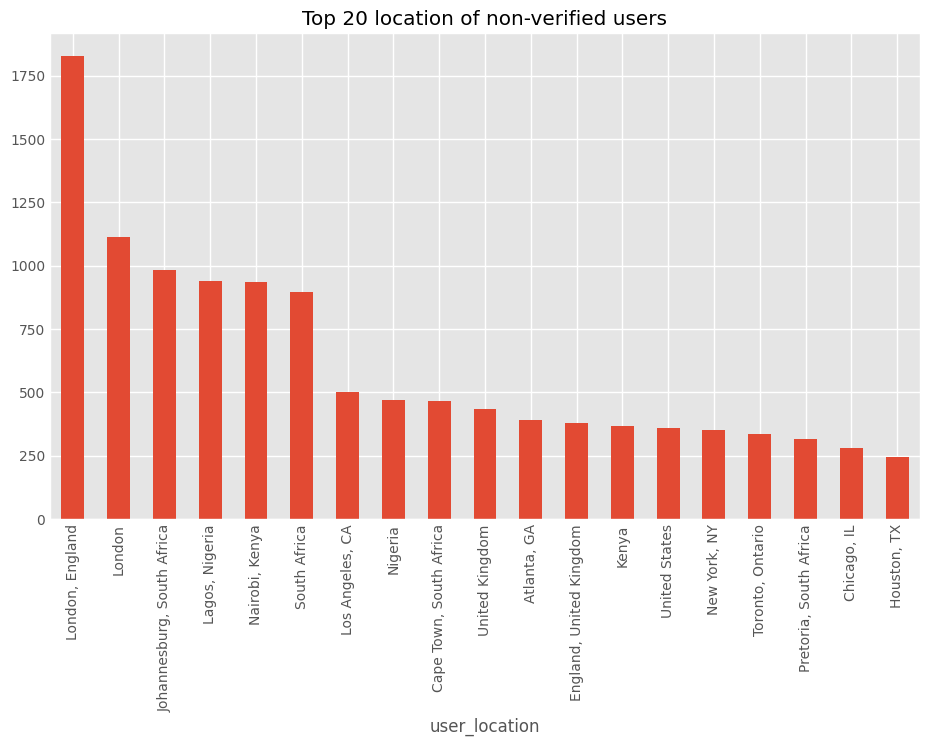

In [131]:
df[df["user_verified"] == False]["user_location"].value_counts().head(20).drop("Unknown")\
.plot(kind="bar", figsize=(10, 6), x="user_location", title="Top 20 location of non-verified users")

In [132]:
df.sample(2)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
30440,Alicia Adejobi,London,2010-07-06 23:18:41+00:00,2297,True,2022-02-06 21:48:57+00:00,the only thing I'll say about the #TinderSwind...,Twitter Web App,False
63135,Liland,Unknown,2022-02-04 10:44:04+00:00,3,False,2022-02-04 11:12:34+00:00,@Sifill_LDF @60Minutes Here is a good opportun...,Twitter for iPhone,False


In [140]:
df.sort_values("user_followers", ascending=False)[["user_name","user_location","user_followers", "user_verified", "text"]].head(20)

,user_name,user_location,user_followers,user_verified,text
15312,The Wall Street Journal,"New York, NY",19410390,True,"Simon Leviev, the subject of Netflix's documen..."
8085,The Wall Street Journal,"New York, NY",19410385,True,"Simon Leviev, the subject of Netflix's documen..."
3369,The Wall Street Journal,"New York, NY",19410383,True,"Simon Leviev, the subject of Netflix's documen..."
28234,The Washington Post,"Washington, DC",18670019,True,Netflix released a new true crime documentary ...
74799,Netflix,"California, USA",15940034,True,This is what it feels like when a con artist w...
58387,Netflix,"California, USA",15939686,True,"Posing as a wealthy, jet-setting diamond mogul..."
8760,Netflix,"California, USA",15938865,True,the heroes of The Tinder Swindler https://t.co...
37690,E! News,"Hollywood, CA",11782960,True,There Are Bad Dates and Then There's The Tinde...
21451,E! News,"Hollywood, CA",11782932,True,Tinder Swindler Con Man Banned From Dating App...
11541,E! News,"Hollywood, CA",11782911,True,French Montana Reveals He Met the Tinder Swind...


In [142]:
df.sort_values("user_followers", ascending=False)[["user_name"]].value_counts()

user_name                 
.                             196
Unresolved Debts Awareness    160
Summer’s ponytail             108
Viral Kenyan Magazine          94
saint                          72
                             ... 
MonaLisa🖤                       1
Monaco Quant                    1
Monae’ 💕                        1
CareFreeLee                     1
🫂🍃                              1
Name: count, Length: 49766, dtype: int64

<Axes: title={'center': 'Top 20 active user_name with highest followers'}, xlabel='user_name'>

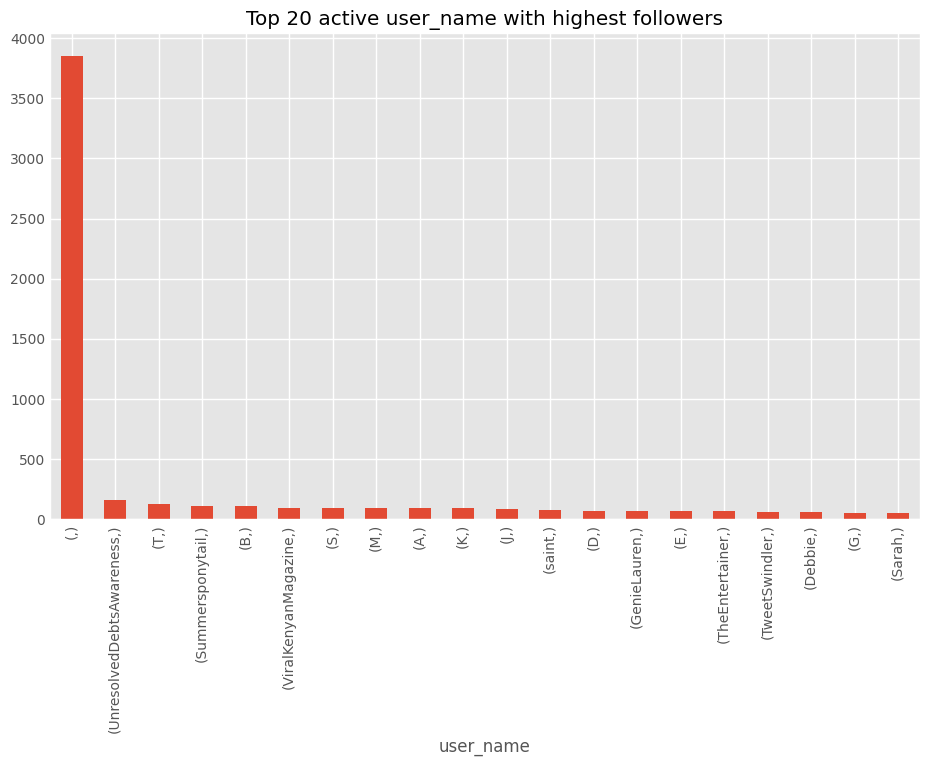

In [156]:
df.sort_values("user_followers", ascending=False)[["user_name"]].value_counts().head(20)\
.plot(kind="bar", figsize=(10, 6), x="user_name", title="Top 20 active user_name with highest followers")

In [144]:
df.sample(2)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
12661,Joshuasgrandson,Unknown,2020-01-19 18:29:29+00:00,2654,False,2022-02-08 10:52:04+00:00,What if tinder swindler us like blue therapy ai,Twitter for iPhone,False
43224,khandy🍭,Ghana,2016-11-11 21:03:03+00:00,2465,False,2022-02-06 00:52:08+00:00,herh Simon 🤣 #tinderswindler,Twitter for iPhone,False


In [153]:
import re

# remove emoji from user_name
def extract_alphanumeric(text):
    if isinstance(text, str): # Check if text is string
        # Define the regex pattern to match alphanumeric characters
        alphanumeric_pattern = re.compile(r'[a-zA-Z0-9]')
        # Find all matches in the input text
        matches = alphanumeric_pattern.findall(text)
        # Join all matches into a single string
        return ''.join(matches)
    else:
        return "" # return empty string if not a string

In [154]:
df["user_name"] = df["user_name"].apply(extract_alphanumeric)

In [155]:
df.head(10)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
0,globalnodesaito,Travelling the World on Web3,2009-06-03 20:18:22+00:00,768,False,2022-02-09 17:09:22+00:00,"@T1gmee Tinder Swindler, off Netflix",Twitter for iPhone,False
1,Ungovernable,Unknown,2011-09-04 22:46:26+00:00,385,False,2022-02-09 17:09:18+00:00,"#tinderswindler , basically homeboy got away w...",Twitter for iPhone,False
2,Adefolake,Unknown,2009-06-02 14:18:44+00:00,1994,False,2022-02-09 17:09:17+00:00,Not the tinder swindler becoming a TIk Tok sta...,Twitter for iPhone,False
3,,Noord-Brabant,2012-02-12 07:35:26+00:00,336,False,2022-02-09 17:09:07+00:00,Why isn’t Shimon Hayut in jail ????? #thetinde...,Twitter for iPhone,False
4,chivo,PG/MD,2010-03-22 21:23:17+00:00,1046,False,2022-02-09 17:09:06+00:00,the tinder swindler a sick nigga 😂😂,Twitter Web App,False
5,kira,"Toronto, Ontario",2010-07-02 12:50:53+00:00,362,False,2022-02-09 17:09:03+00:00,No those women on the Tinder swindler pissed m...,Twitter for iPhone,False
6,fogmistress698,Unknown,2020-05-05 08:47:57+00:00,210,False,2022-02-09 17:08:55+00:00,This manipulation is how scammers pull you in ...,Twitter Web App,False
7,melraunch,"East, England",2019-05-24 23:18:01+00:00,3268,False,2022-02-09 17:08:45+00:00,@robertstweets1 @DistantFixed I waited for him...,Twitter for iPhone,False
8,PamelaPower,"Johannesburg, South Africa",2009-07-10 12:51:24+00:00,6306,False,2022-02-09 17:08:41+00:00,Hmmm...he's like the #tinderswindler https://t...,Twitter for Android,False
9,CaliMcCormac,Unknown,2022-02-09 16:48:06+00:00,0,False,2022-02-09 17:08:40+00:00,Wow just watching the Twitter Swindler and it ...,Twitter for iPhone,False


In [159]:
df.sort_values("user_followers", ascending=False)

,user_name,user_location,user_created,user_followers,user_verified,date,text,source,is_retweet
15312,TheWallStreetJournal,"New York, NY",2007-04-01 06:22:13+00:00,19410390,True,2022-02-08 03:45:10+00:00,"Simon Leviev, the subject of Netflix's documen...",SocialFlow,False
8085,TheWallStreetJournal,"New York, NY",2007-04-01 06:22:13+00:00,19410385,True,2022-02-08 20:15:05+00:00,"Simon Leviev, the subject of Netflix's documen...",SocialFlow,False
3369,TheWallStreetJournal,"New York, NY",2007-04-01 06:22:13+00:00,19410383,True,2022-02-09 07:00:12+00:00,"Simon Leviev, the subject of Netflix's documen...",SocialFlow,False
28234,TheWashingtonPost,"Washington, DC",2007-03-27 11:19:39+00:00,18670019,True,2022-02-07 01:04:22+00:00,Netflix released a new true crime documentary ...,SocialFlow,False
74799,Netflix,"California, USA",2008-10-03 04:16:17+00:00,15940034,True,2022-02-02 19:00:58+00:00,This is what it feels like when a con artist w...,Netflix,False
...,...,...,...,...,...,...,...,...,...
4357,HappilyTOXIC,Unknown,2021-12-07 20:19:25+00:00,0,False,2022-02-09 04:12:06+00:00,That “Tinder Swindler” was mind blowing 🤯 and ...,Twitter for iPhone,False
74358,FeministLite,Unknown,2021-12-03 02:30:21+00:00,0,False,2022-02-02 20:14:50+00:00,I love how happy Ayleen looks while executing ...,Twitter for Android,False
22703,ChourahbilAyoub,Unknown,2021-06-17 12:31:44+00:00,0,False,2022-02-07 15:04:12+00:00,Holy Crap !!! I just realized that The Tinder ...,Twitter for iPhone,False
60284,SarkarMysore,"Mysore, India",2022-01-15 08:46:35+00:00,0,False,2022-02-04 19:02:58+00:00,Most documentaries are boring.\n\nBut the righ...,Twitter for Android,False


In [164]:
df.sort_values("user_followers", ascending=False)["user_name"].head(10)

15312    TheWallStreetJournal
8085     TheWallStreetJournal
3369     TheWallStreetJournal
28234       TheWashingtonPost
74799                 Netflix
58387                 Netflix
8760                  Netflix
37690                   ENews
21451                   ENews
11541                   ENews
Name: user_name, dtype: object

In [171]:
df.sort_values("user_followers", ascending=False)["user_name"].head(20)

15312    TheWallStreetJournal
8085     TheWallStreetJournal
3369     TheWallStreetJournal
28234       TheWashingtonPost
74799                 Netflix
58387                 Netflix
8760                  Netflix
37690                   ENews
21451                   ENews
11541                   ENews
19356                HuffPost
74857             TheGuardian
76048             TheGuardian
8768                  NBCNews
973                       IGN
66854                  People
4659                   People
74853            RollingStone
33944                BuzzFeed
5999                 BuzzFeed
Name: user_name, dtype: object

In [174]:
df.sort_values("user_followers", ascending=False)["user_name"].head(20).value_counts()

user_name
TheWallStreetJournal    3
Netflix                 3
ENews                   3
TheGuardian             2
People                  2
BuzzFeed                2
TheWashingtonPost       1
HuffPost                1
NBCNews                 1
IGN                     1
RollingStone            1
Name: count, dtype: int64

<Axes: title={'center': 'Top 20 active user_name with highest followers'}, xlabel='user_name'>

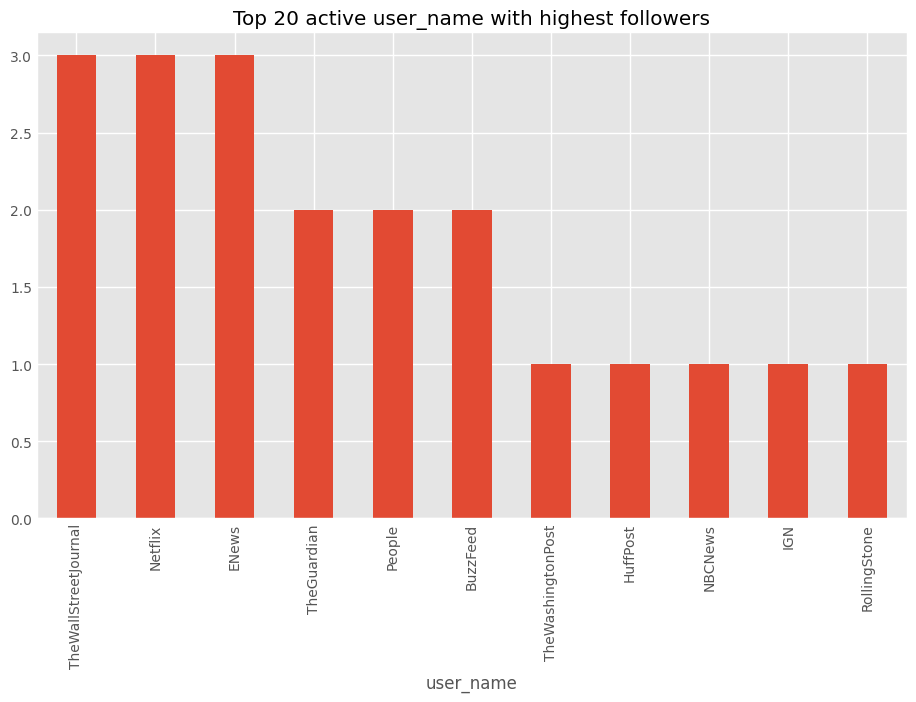

In [175]:
df.sort_values("user_followers", ascending=False)["user_name"].head(20).value_counts().plot(kind="bar", figsize=(10, 6), x="user_name", title="Top 20 active user_name with highest followers")